In [2]:
import lhapdf
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## Getting a PDF member object
p_cteq6 = lhapdf.mkPDF("cteq6l1", 0)
p_cteq6 = lhapdf.mkPDF("cteq6l1/0")

LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/cteq6l1/cteq6l1_0000.dat
cteq6l1 PDF set, member #0, version 4; LHAPDF ID = 10042
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/cteq6l1/cteq6l1_0000.dat
cteq6l1 PDF set, member #0, version 4; LHAPDF ID = 10042


LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_FF_pion_nlo/JAM20-SIDIS_FF_pion_nlo_0000.dat
JAM20-SIDIS_FF_pion_nlo PDF set, member #0, version 2


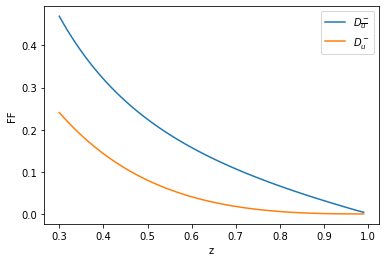

In [4]:
JAM20 = lhapdf.mkPDF("JAM20-SIDIS_FF_pion_nlo", 0)
JAM20_Dum = []
JAM20_Dup = []
JAM20_Deltaz = []
zs = np.linspace(0.3,0.99,100)
for zi in zs:
    dup = JAM20.xfxQ(2,zi,2)
    dum = JAM20.xfxQ(-2,zi,2)
    #print(dup,' ',dum)
    JAM20_Dum.append(dum)
    JAM20_Dup.append(dup)
    JAM20_Deltaz.append(dum/dup)
plt.plot(zs,JAM20_Dup,label = r'$D^-_{\overline{u}}$')
plt.plot(zs,JAM20_Dum,label = r'$D^-_u$')

plt.xlabel('z')
plt.ylabel('FF')
plt.legend()

Text(0.5, 0, 'z')

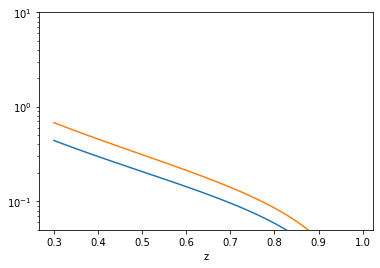

In [5]:
x = 0.32
Q = 2
dsigdzp = []
dsigdzd = []
fig = plt.figure()
ax = fig.add_subplot()
for zi in zs:
    D_u = JAM20.xfxQ(2,zi,Q)
    D_ubar = JAM20.xfxQ(-2,zi,Q)
    D_d = JAM20.xfxQ(1,zi,Q)
    D_dbar = JAM20.xfxQ(-1,zi,Q)
    D_s = JAM20.xfxQ(3,zi,Q)
    D_sbar = JAM20.xfxQ(-3,zi,Q)
    y_dv=p_cteq6.xfxQ(1,x,Q)
    y_uv=p_cteq6.xfxQ(2,x,Q)
    y_dbar=p_cteq6.xfxQ(-1,x,Q)
    y_ubar=p_cteq6.xfxQ(-2,x,Q)
    y_s=p_cteq6.xfxQ(3,x,Q)
    y_sbar=p_cteq6.xfxQ(-3,x,Q)
    sum_sq=((4/9)*(y_uv+y_ubar)+(1/9)*(y_dv+y_dbar)+(1/9)*(y_s+y_sbar))
    dsigdzp_zi = ((4/9)*(y_uv*D_u+y_ubar*D_ubar)+(1/9)*(y_dv*D_d+y_dbar*D_dbar)+(1/9)*(y_s*D_s+y_sbar*D_sbar))/sum_sq
    dsigdzd_zi = dsigdzp_zi+((4/9)*(y_dv*D_u+y_dbar*D_ubar)+(1/9)*(y_uv*D_d+y_ubar*D_dbar)+(1/9)*(y_s*D_s+y_sbar*D_sbar))/sum_sq
    dsigdzp.append(dsigdzp_zi)
    dsigdzd.append(dsigdzd_zi)
plt.plot(zs,dsigdzp,label = r"$\sigma_p$")
plt.plot(zs,dsigdzd,label = r"$\sigma_d$")
plt.ylim(0.05,10)
ax.set_yscale("log")
plt.xlabel('z')
#plt.legend()

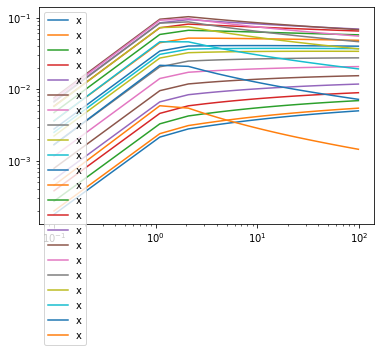

In [14]:
Q2_axis = np.arange(0.1,100,1)

x_axis = [0.008,0.009,0.0125,0.0175,0.025,0.035,0.05,0.07,0.09,0.1,0.11,0.14,0.18,0.225,0.275,0.35,0.45,0.5,0.55,0.65,0.75,0.85]

fig = plt.figure()
ax = fig.add_subplot()
for i in range(0,22):
    x = x_axis[i]
  
    y_F2x = []
    for Q2 in np.arange(0.1,100,1):
        Q = math.sqrt(Q2)
       
        y_dv=p_cteq6.xfxQ(1,x,Q)
        y_uv=p_cteq6.xfxQ(2,x,Q)
        y_dbar=p_cteq6.xfxQ(-1,x,Q)
        y_ubar=p_cteq6.xfxQ(-2,x,Q)
        y_s=p_cteq6.xfxQ(3,x,Q)
        y_sbar=p_cteq6.xfxQ(-3,x,Q)
        y_F2x.append(x*(4/9)*(y_uv+y_ubar)+x*(1/9)*(y_dv+y_dbar)+x*(1/9)*(y_s+y_sbar))
   
    F2x=np.asarray(y_F2x)
    
    plt.plot(Q2_axis,F2x,label = "x")
ax.set_xscale("log")
ax.set_yscale("log")
plt.legend()